<a href="https://colab.research.google.com/github/Harsh18999/90-days-challenge-of-daily-data-discipline-/blob/main/Day_2/Day_2_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implimentation of Simple Linear Regression and Evaluation Matrics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


Text(0, 0.5, 'Salary')

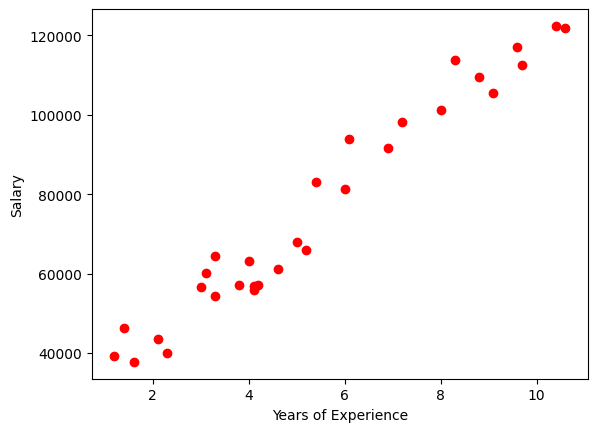

In [7]:
plt.scatter(data.YearsExperience,data.Salary,color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [70]:
X,Y = data.YearsExperience.values,data.Salary.values

In [71]:
X,Y

(array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
         4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
         8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6]),
 array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
         54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
         61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
         98274., 101303., 113813., 109432., 105583., 116970., 112636.,
        122392., 121873.]))

In [93]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m= X.shape[0]
    self.n = 1         # number of rows & columns

    # initiating the weight and bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = np.array([self.predict(np.array(x))[0] for x in self.X])

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):

    return X.dot(self.w) + self.b



In [94]:
Model = Linear_Regression(0.01,1000)

In [95]:
Model.fit(X,Y)

In [97]:
Y_pred = [Model.predict(np.array(x))[0] for x in X]

Text(0, 0.5, 'Salary')

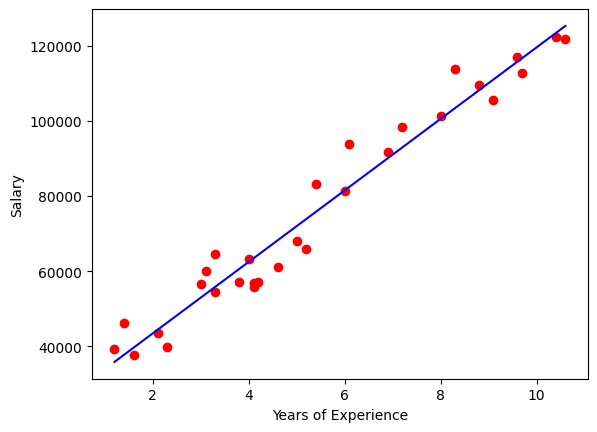

In [101]:
plt.scatter(X,Y,color='red')
plt.plot(X,Y_pred,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

**Evaluation Matrics**

*   MAE
*   MSE
*   RMSE
*   R2 Score
*   Adjusted R2 Score



In [103]:
# Implimentation of MAE
MAE = np.sum([abs(Y[i]-Y_pred[i]) for i in range(len(Y))])/len(Y)
print(f'Mean Absolute Error is : {MAE}')

Mean Absolute Error is : 4637.2056029135865


In [106]:
# Implimentation of MSE
MSE = np.sum([(Y[i]-Y_pred[i])**2 for i in range(len(Y))])/len(Y)
print(f'Mean Squared Error is : {MSE}')

Mean Squared Error is : 31300260.021449663


In [108]:
# Implimentation of MSE
RMSE = np.sqrt(np.sum([(Y[i]-Y_pred[i])**2 for i in range(len(Y))])/len(Y))
print(f'Root Mean Squared Error is : {RMSE}')

Root Mean Squared Error is : 5594.6635306736425


In [110]:
# Implimentation of R2 Score
SSR = np.sum([(Y[i] - Y_pred[i])**2 for i in range(len(Y))])
Y_mean = np.sum(Y)/len(Y)
SSM = np.sum([(Y[i] - Y_mean)**2 for i in range(len(Y))])
R2_Score = 1 - (SSR/SSM)
print(f'R2 Score is : {R2_Score}')

R2 Score is : 0.9569163223280209


In [111]:
# Implimentation of Adjusted R2 Score
SSR = np.sum([(Y[i] - Y_pred[i])**2 for i in range(len(Y))])
Y_mean = np.sum(Y)/len(Y)
SSM = np.sum([(Y[i] - Y_mean)**2 for i in range(len(Y))])
R2_Score = 1 - (SSR/SSM)
R2_Adj = 1 - (((1-R2_Score)*(len(Y)-1))/(len(Y)-1-1))
print(f'Adjusted R2 Score is : {R2_Adj}')

Adjusted R2 Score is : 0.9553776195540217
